In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [1]:
import pandas.tools.rplot as rplot

ModuleNotFoundError: No module named 'pandas.tools'

In [2]:
df= pd.read_excel('C:\\Users\\Admin\\Desktop\\data analyst\\datasets\\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Target variable encoding
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'].mean()

0.2653698707936959

In [4]:
# Handling missing values in the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].replace(' ',
np.nan).astype(float)
df = df.dropna()

In [5]:
#Transforming continuous variables
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [6]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] -
df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()
df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] -
df['TotalCharges'].mean())/df['TotalCharges'].std()
df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [7]:
#One-hot encoding categorical variables
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


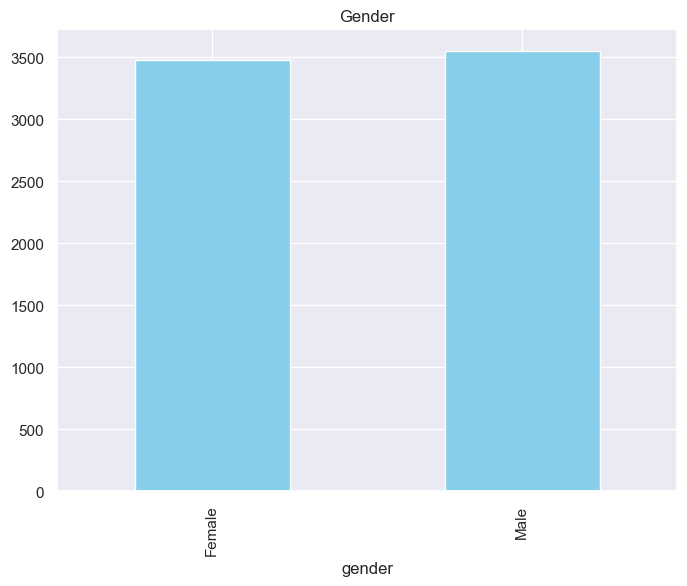

In [8]:
df.groupby('gender').count()['customerID'].plot(
kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

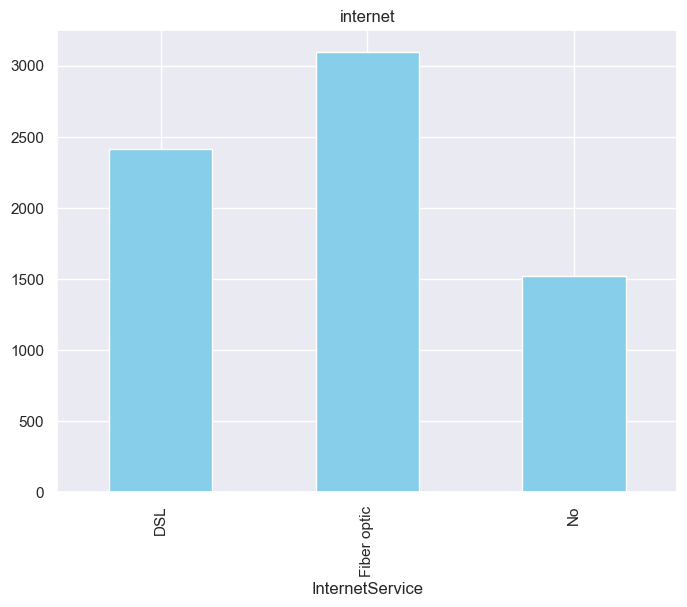

In [9]:
df.groupby('InternetService').count()['customerID'].plot(
kind='bar', color='skyblue', grid=True, figsize=(8,6), title='internet'
)
plt.show()

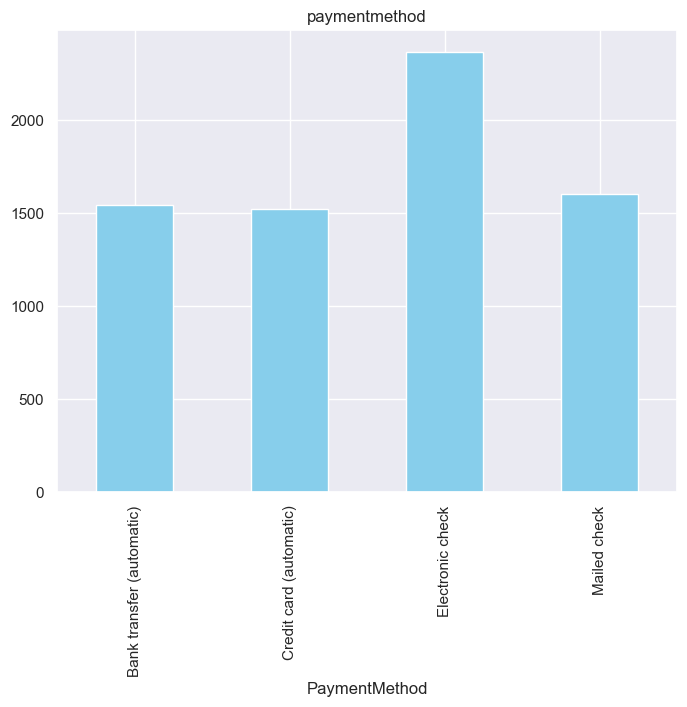

In [10]:
df.groupby('PaymentMethod').count()['customerID'].plot(
kind='bar', color='skyblue', grid=True, figsize=(8,6), title='paymentmethod'
)
plt.show()


In [11]:
dummy_cols = []
sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)
for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [12]:
sample_set.head()

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0.064298,0.032896,0.389269,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,-1.239416,-0.061298,-1.452520,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0.512450,-0.467578,0.372439,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,-1.239416,0.396862,-1.234860,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [13]:
import tensorflow as tf

In [14]:
# train test split
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

In [15]:
#ANN with Keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=len (features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features], 
    sample_set[target_var], 
    test_size=0.3
)

In [21]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test=np.asarray(X_test).astype(np.float32)

In [19]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 0.5777 - accuracy: 0.7422
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4700 - accuracy: 0.7735
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.7991
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4188 - accuracy: 0.8046
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4140 - accuracy: 0.8039
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4097 - accuracy: 0.8043
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4085 - accuracy: 0.8066
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4064 - accuracy: 0.8104
Epoch 9/50
50/50 [==============================] - 0s 7ms/step - loss: 0.4054 - accuracy: 0.8086
Epoch 10/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8086
Epoch 11/50
50/50 [

In [22]:
###model evaulation
from sklearn.metrics import accuracy_score, precision_score, recall_score
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]
# Accuracy
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))
# Precision
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))
# Recall
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

66/66 [==============================] - 0s 3ms/step
In-Sample Accuracy: 0.8184
Out-of-Sample Accuracy: 0.8038
In-Sample Precision: 0.6994
Out-of-Sample Precision: 0.7258
In-Sample Recall: 0.5134
Out-of-Sample Recall: 0.5074


In [23]:
from sklearn.metrics import roc_curve, auc
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train,
in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test,
out_sample_preds)
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)
print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

66/66 [==============================] - 0s 3ms/step
In-Sample AUC: 0.8653
Out-Sample AUC: 0.8507


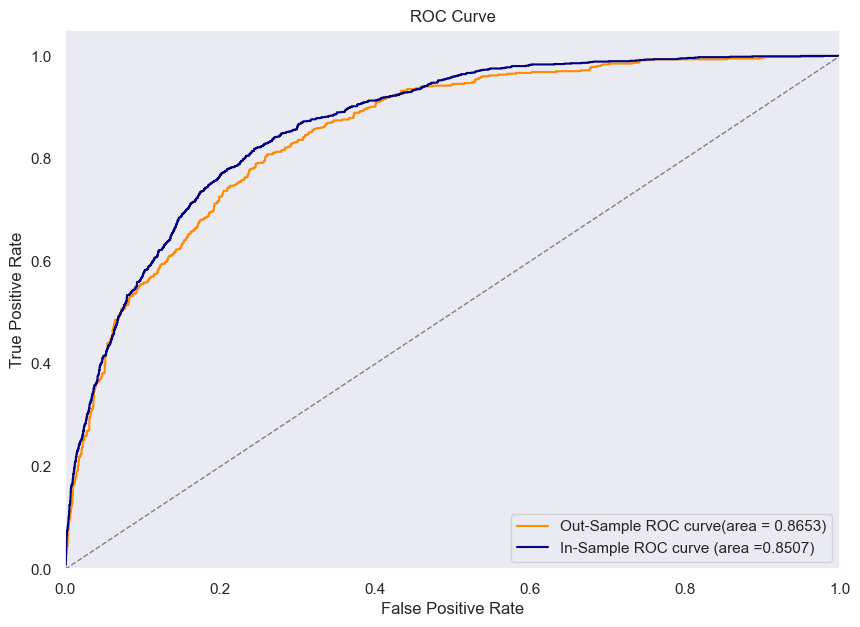

In [26]:
plt.figure(figsize=(10,7))
plt.plot(
out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve(area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area =%0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")